<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Разбивка-данных-на-выборки" data-toc-modified-id="Разбивка-данных-на-выборки-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбивка данных на выборки</a></span></li><li><span><a href="#Исследование-моделей" data-toc-modified-id="Исследование-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-классификатор-Дерева-Решений-(Decision-Tree-Classifier)" data-toc-modified-id="Модель-классификатор-Дерева-Решений-(Decision-Tree-Classifier)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель классификатор Дерева Решений (Decision Tree Classifier)</a></span></li><li><span><a href="#Модель-классификатор-Случайный-Лес-(Random-Forest)" data-toc-modified-id="Модель-классификатор-Случайный-Лес-(Random-Forest)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Модель классификатор Случайный Лес (Random Forest)</a></span></li><li><span><a href="#Модель-классификатор-Логистическая-регрессия-(Logistic-Regression)" data-toc-modified-id="Модель-классификатор-Логистическая-регрессия-(Logistic-Regression)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель классификатор Логистическая регрессия (Logistic Regression)</a></span></li></ul></li><li><span><a href="#Проверка-лучшей-модели" data-toc-modified-id="Проверка-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка лучшей модели</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Рекомендация тарифов

«Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». В доступе данные о поведении клиентов, которые уже перешли на эти тарифы. 

**Цель:** построить модель для задачи классификации, которая выберет подходящий тариф. <br>
**Задача:** построить модель с максимально большим значением *accuracy* (min 0.75).

Этапы исследования:
1. Обзор данных;
2. Разбивка данных на выборки;
3. Исследование моделей; 
4. Проверка моделей. 

## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('users_behavior.csv')

print('Размер файла:', df.shape)
display(df.head())

Размер файла: (3214, 5)


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


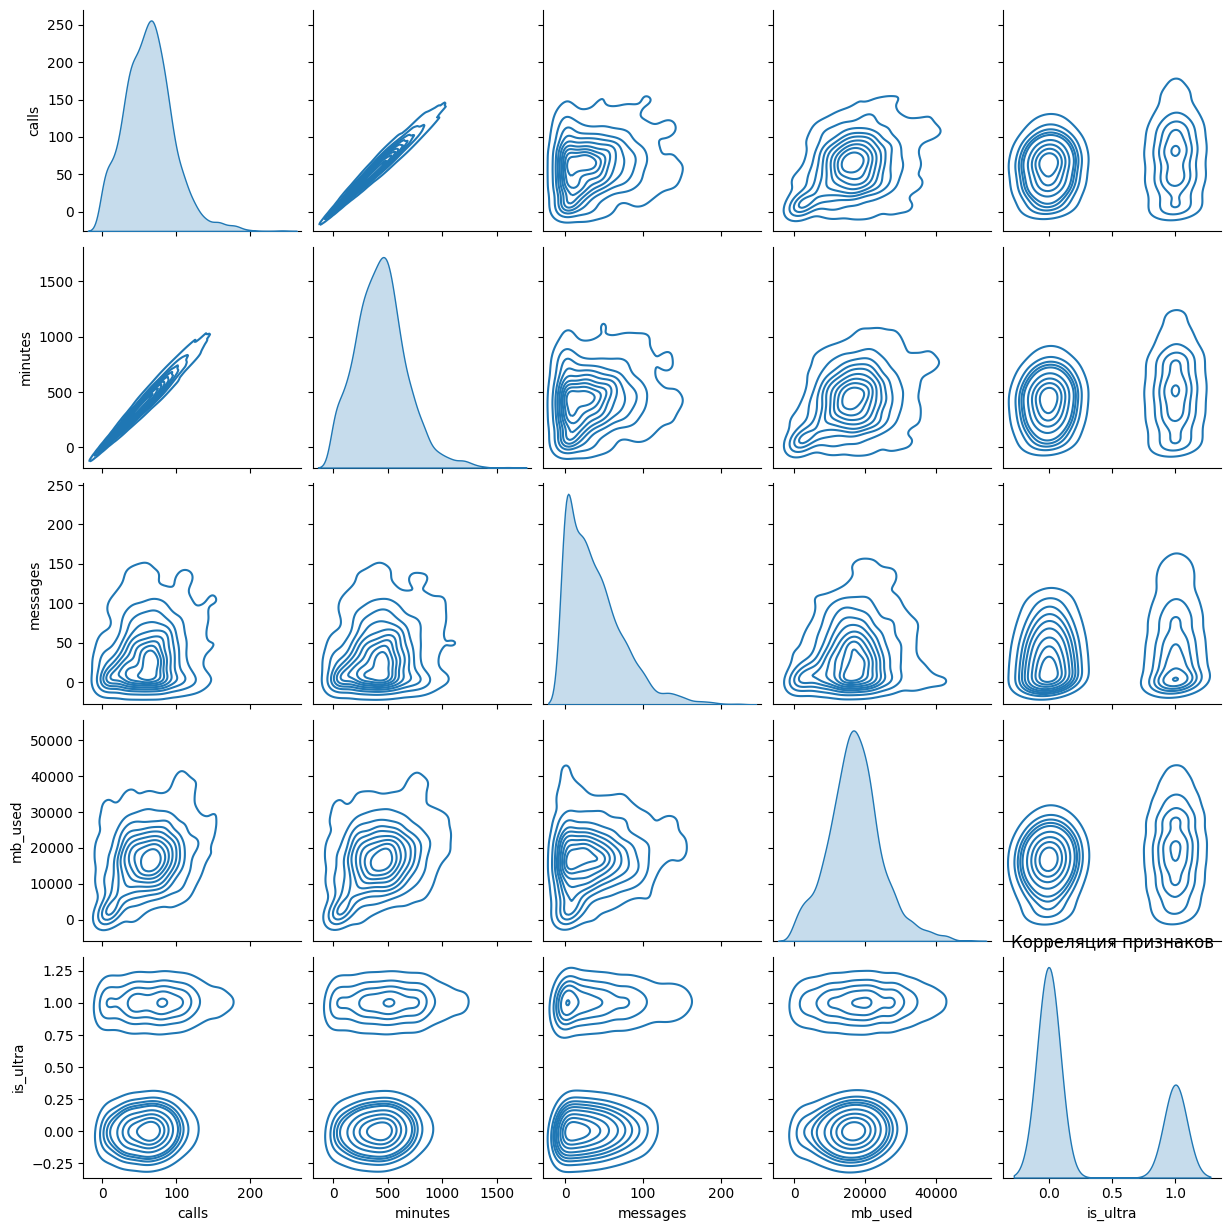

In [3]:
var = ['calls', 'minutes', 'messages', 'mb_used','is_ultra']
sns.pairplot(df, vars=var, kind="kde", palette='Set2')

plt.title('Корреляция признаков')
plt.show();

В таблице 3214 строк (объектов), 5 столбцов (признаков). Целевой признак `is_ultra`, тариф Ултьра или Смарт. Наиболее сильная корреляция между признаками calls и minutes (что логично). <br>

`сalls` — количество звонков,<br>
`minutes` — суммарная длительность звонков в минутах,<br>
`messages` — количество sms-сообщений,<br>
`mb_used` — израсходованный интернет-трафик в Мб,<br>
`is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).<br>

Целевой признак категориальный, поэтому мы будем использовать модели классификации, и так как категорий всего две перед нами задача бинарной (двоичной) классификации.

## Разбивка данных на выборки

In [4]:
features = df.drop(['is_ultra'], axis=1)
target = df['is_ultra']

features_train, features_test_val, target_train, target_test_val = train_test_split(features, target,
                                                                                    test_size=0.40,
                                                                                    random_state=12345)
features_test, features_valid, target_test, target_valid = train_test_split(features_test_val, target_test_val,
                                                                                    test_size=0.50,
                                                                                    random_state=12345)

print('Размер обучающей выборки:')
print(features_train.shape)
print(target_train.shape)

print('Размер валидационной выборки:')
print(features_valid.shape)
print(target_valid.shape)
      
print('Размер тестовой выборки:')
print(features_test.shape)
print(target_test.shape)

Размер обучающей выборки:
(1928, 4)
(1928,)
Размер валидационной выборки:
(643, 4)
(643,)
Размер тестовой выборки:
(643, 4)
(643,)


In [5]:
features_train.head()

,calls,minutes,messages,mb_used
3027,60.0,431.56,26.0,14751.26
434,33.0,265.17,59.0,17398.02
1226,52.0,341.83,68.0,15462.38
1054,42.0,226.18,21.0,13243.48
1842,30.0,198.42,0.0,8189.53


In [6]:
target_train.value_counts()

0    1335
1     593
Name: is_ultra, dtype: int64

Разбили данные на три выборки: 
- train - обучающая (features_train, target_train)
- valid - валидационная (features_valid, target_valid)
- test - тестовая(features_test, target_test)

## Исследование моделей

In [7]:
RANDOM = 12345

Создадим функцию для поиска лучших параметров для моделей

In [8]:
def best(model, params, features_train, target_train):
    
    grid = GridSearchCV(model, params, cv=3, scoring='accuracy')
    grid.fit(features_train, target_train)
    
    accuracy = grid.best_score_ #метрика лучшей модели 
    the_best_model = grid.best_estimator_ #сохраняю лучшую модель уже обученную на всей train выборке
    
    print(f'Accuracy: {accuracy}')
    print(grid.best_params_)
    
    return the_best_model

### Модель классификатор Дерева Решений (Decision Tree Classifier)

In [9]:
param_tree = {'max_depth': range(1, 10),
               'criterion': ['gini', 'entropy'],
               'max_features': range(1, 10),
               'splitter': ['best', 'random']
              }

In [10]:
model_tree = DecisionTreeClassifier(random_state=RANDOM)

In [11]:
tree_best = best(model_tree, param_tree, features_train, target_train)

Accuracy: 0.8034242073354877
{'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'splitter': 'best'}


### Модель классификатор Случайный Лес (Random Forest)

In [12]:
param_forest = {'max_depth': range(1, 10),
                'n_estimators': range(10, 101, 10),
                'max_features': range(1, 5),
               }

In [13]:
model_forest = RandomForestClassifier(random_state=RANDOM)
forest_best = best(model_forest, param_forest, features_train, target_train)

Accuracy: 0.8215812431666852
{'max_depth': 9, 'max_features': 4, 'n_estimators': 40}


### Модель классификатор Логистическая регрессия (Logistic Regression)

In [14]:
param_lr = {'solver': ['lbfgs', 'liblinear'],
            'max_iter': range(10, 100)
           }

In [15]:
model_lr = LogisticRegression(random_state=RANDOM)
lr_best = best(model_lr, param_lr, features_train, target_train)

Accuracy: 0.7401539706302719
{'max_iter': 84, 'solver': 'lbfgs'}


## Проверка лучшей модели

In [18]:
best_model = RandomForestClassifier(random_state=RANDOM, criterion='entropy', \
                                    max_depth=9, max_features=4, n_estimators=40)
best_model.fit(features_train, target_train)
best_model.fit(pd.concat([features_train, features_valid]),pd.concat([target_train, target_valid])) 
predictions_train = best_model.predict(features_train)
predictions_test = best_model.predict(features_test)

print("Accuracy на тестовой выборке:", accuracy_score(target_test, predictions_test))


Accuracy на тестовой выборке: 0.8102643856920684


## Проверка модели на адекватность

In [17]:
model_dummy = DummyClassifier(strategy="most_frequent", random_state=12345)
model_dummy.fit(features_train, target_train)
predictions_dummy = model_dummy.predict(features_test)

print('Accuracy наивной модели:', accuracy_score(target_test, predictions_dummy))

Accuracy наивной модели: 0.7060653188180405


## Вывод

1. Был проведен обзор данных: 
- В таблице 3214 строк (объектов), 5 столбцов (признаков); 
- Целевой признак is_ultra (тариф Ультра или Смарт), категориальный, поэтому мы будем использовать модели классификации; 
- Данные разбиты на три выборки: train, valid, test;
- Построены 3 модели классификации: Decision Tree Classifier, Random Forest, Logistic Regression; 
- Лучший результат accuracy получился для модели Random Forest:
    * Accuracy на валидационной выборке: 0.82
    * Accuracy на тестовой выборке: 0.81